In [42]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
%matplotlib inline

In [43]:
surface_density = np.loadtxt('../output/mminmax_density_1deg_fixed.txt')

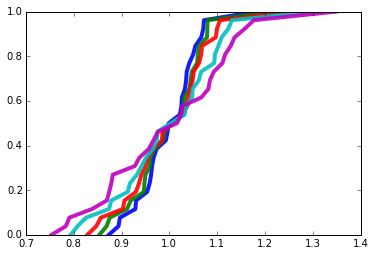

In [66]:
n_lines = len(surface_density)

m_min = surface_density[:,0]
m_min_list = list(set(m_min))

for i in range(n_lines):
    tmp_m_min = m_min[i]
    if tmp_m_min in m_min_list:
        m_min_list.remove(tmp_m_min)
        m_min_tmp = surface_density[i][0]
        sort_n = np.sort(surface_density[i][2:])
        n_points = len(sort_n)
        int_n = np.linspace(0.0,1.0,n_points)
        plt.plot(sort_n/sort_n.mean(), int_n, lw=4, alpha=0.9)

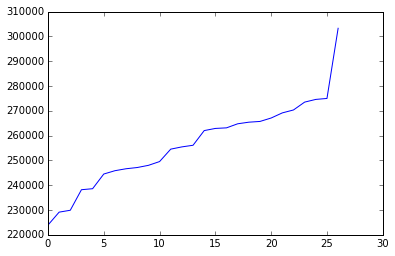